In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veriyi içeri alalım
veri = pd.read_csv("mnist_train.csv")
# 28x28 pixel 785 sütunlu bir veri
print("Veri boyutu : ", veri.shape)
veri.head()

Veri boyutu :  (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# label 'ları ayıralım
Y_veri = veri["label"]
X_veri = veri.drop(["label"], axis = 1)
print("X veri : ", X_veri.shape)
print("Y veri : ", Y_veri.shape)

X veri :  (60000, 784)
Y veri :  (60000,)


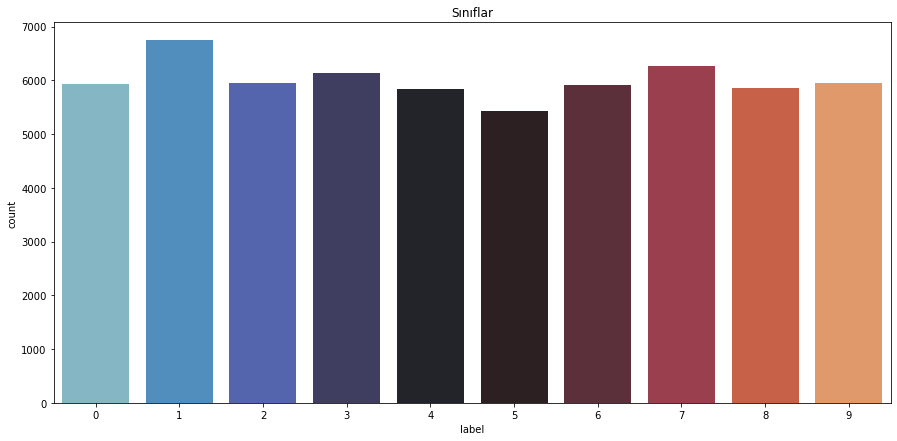

sınıflar ve örnek sayıları :  1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


In [4]:
# Görselleştirme
plt.figure(figsize = (15, 7))
g = sns.countplot(Y_veri, palette = "icefire")
plt.title("Sınıflar")
plt.show()
print("sınıflar ve örnek sayıları : ", Y_veri.value_counts())

In [5]:
# resmin boyutu
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

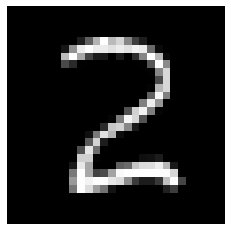

In [6]:
# Görsel - 2 sınıfı
resim1 = X_veri.iloc[1900].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()


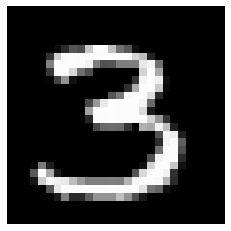

In [7]:
# Görsel - 3 sınıfı
resim1 = X_veri.iloc[19500].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()

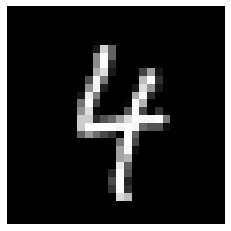

In [8]:
# Görsel - 4 sınıfı
resim1 = X_veri.iloc[26000].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap = "gray")
plt.axis("off")
plt.show()


In [9]:
# Normalizasyon
X_veri = X_veri / 255.0

In [10]:
# reshape
X_veri = X_veri.values.reshape(-1, 28, 28, 1)
print("X eğitim boyut : ", X_veri.shape)

X eğitim boyut :  (60000, 28, 28, 1)


In [11]:
# etiket kodlama
from keras.utils.np_utils import to_categorical # vektöre çevirmek için
y_veri = to_categorical(Y_veri, num_classes = 10)

In [12]:
# train ve test bölünmesi
from sklearn.model_selection import train_test_split
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri, Y_veri, test_size = 0.1, random_state = 2)
print("X train : ", X_egitim.shape)
print("X test : ", X_test.shape)
print("Y train : ", Y_egitim.shape)
print("Y test : ", Y_test.shape)

X train :  (54000, 28, 28, 1)
X test :  (6000, 28, 28, 1)
Y train :  (54000,)
Y test :  (6000,)


In [13]:
# Kütüphaneleri yükleyelim.
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
## from keras.optimizers import RMSprop, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# bunları ben ekledim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = Sequential()
# evrişim, ortaklama, seyreltme - 1 
model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding = "Same",
    activation = "relu", input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# evrişim, ortaklama, seyreltme - 2
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "Same",
    activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.25))
# tam bağlantı
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
# Adam optimizasyon yöntemi
optimizer = tf.keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [16]:
# modeli derleyelim.
model.compile(optimizer = optimizer, 
    loss = "categorical_crossentropy", metrics = ["accurarcy"])

In [17]:
# Döngü sayısı ve eğitim boyutu
batch_size = 250
epochs = 10

In [18]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False, # girdi ortalmasını veri kümesi üzerinden 0 olarak ayarla
    samplewise_center = False, # her bir örenk ortalamasını 0 olarak ayarla
    featurewise_std_normalization = False, # girdileri veri kümesinin standartlarına böl
    samplewise_std_normalization = False, # her girdiyi std'ye böl
    zca_whitening = False, # dimension reduction
    rotation_range = 5, # boyut küçültme
    zoom_range = 0.1, # %10 görüntüyü rasgele yaklaştır.
    width_shift_range = 0.1, # yatay rasgele kaydır
    height_shift_range = 0.1, # dikey rasgele kaydır
    horizontal_flip = False, # yatay rasgele çevir
    vertical_flip = False # dikey rasgele çevir
)
datagen.fit(X_egitim)

In [24]:
# Modeli eğitelim.
history = model.fit_generator(
    datagen.flow(X_egitim, Y_egitim, batch_size = batch_size),
    epochs = epochs, validation_data = (X_test, Y_test), 
    steps_per_epoch = (X_egitim.shape[0] // batch_size), verbose = 2
)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Vedat\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [25]:
# maliyet görselleştirme
plt.plot(history.history["val_los"], color = "b")
plt.title("Test Maliyet")
plt.xlabel("İterasyon")
plt.ylabel("Malyet")
plt.show()

NameError: name 'history' is not defined

In [30]:
# tahmin
Y_pred = model.predict(X_test)
# tahmin edilen veriyi çevir
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# test verisini çevir
Y_true = np.argmax(Y_test, axis = 1)
# karışıklık matrisi
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# karışıklık matrisini çiz
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, 
    cmap = "Greens", linecolor = "gray", fmt = ".1f", ax = ax)
plt.xlabel("Tahminlenen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Karışıklık Matrisi")
plt.show()

ValueError: `axis` must be fewer than the number of dimensions (1)